# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')
%matplotlib notebook

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [68]:
import numpy as np
from scipy.special import gamma

def getSphereVolumeExact(D, R = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R по явной формуле

    --------
    Аргументы:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    V = np.pi ** (D / 2) / gamma(1 + D / 2)
    
    return V

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

In [69]:
# для круга

D = 2
V = getSphereVolumeExact(D)
print(V)

# для трёхмерного шара 

D = 3
V = getSphereVolumeExact(D)
print(V)

3.141592653589793
4.188790204786391


<IPython.core.display.Javascript object>


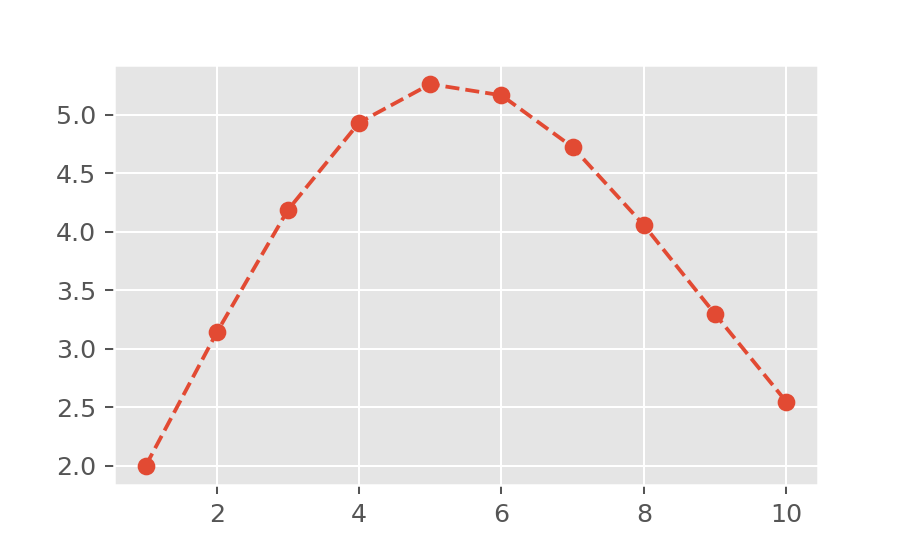

In [126]:
import matplotlib.pyplot as plt

D = range(1, 11)
V = [getSphereVolumeExact(d) for d in D]


plt.figure(figsize=(5, 3))
plt.plot(D, V, 'o--')
plt.show()

### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [71]:
def getSphereVolumePseudorandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на псевдослучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    x = np.random.uniform(low=-1, high=1, size=(N, D))
    xx = np.sum(x ** 2, axis=1)
    x_inside = xx[xx <= 1]
    N_inside = x_inside.shape[0]
    V_sqr = 2 ** D
    
    V = V_sqr * N_inside / N
    
    return V

Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

<IPython.core.display.Javascript object>


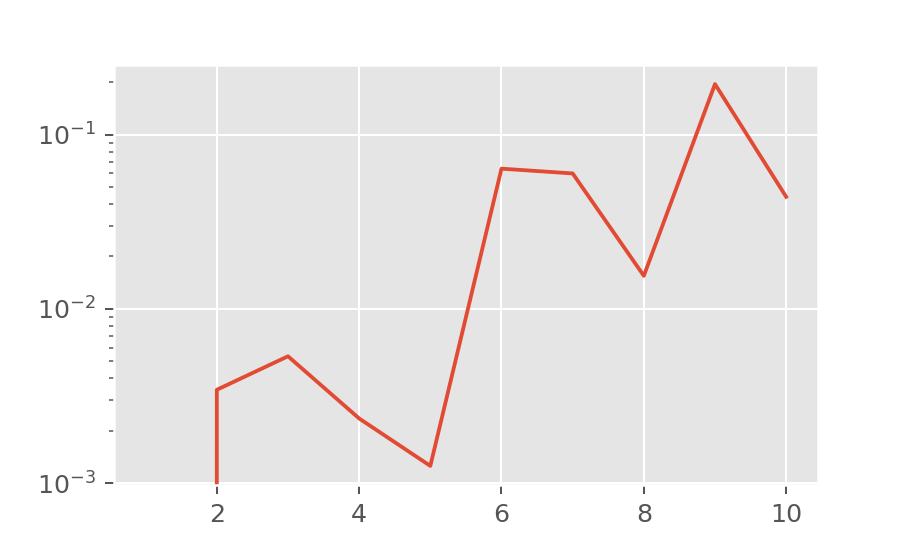

In [123]:
N = 10000

D = range(1, 11)
V_exact = np.asarray([getSphereVolumeExact(d) for d in D])
V_random = np.asarray([getSphereVolumePseudorandom(N, d) for d in D])
eps = np.abs((V_exact - V_random)) / V_exact


plt.figure(figsize=(5, 3))
plt.plot(D, eps)
plt.yscale("log")
plt.show()

### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [74]:
!pip install sobol_seq 
import sobol_seq

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [75]:
sobol_seq.i4_sobol_generate?

In [86]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на квазислучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    x = sobol_seq.i4_sobol_generate(D, N)
    for d in range(D): 
        x[:, d] = 2 * x[:, d] - 1 
        
    xx = np.sum(x ** 2, axis=1)
    x_inside = xx[xx <= 1]
    N_inside = x_inside.shape[0]
    V_sqr = 2 ** D
    
    V = V_sqr * N_inside / N
    
    return V

Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

<IPython.core.display.Javascript object>


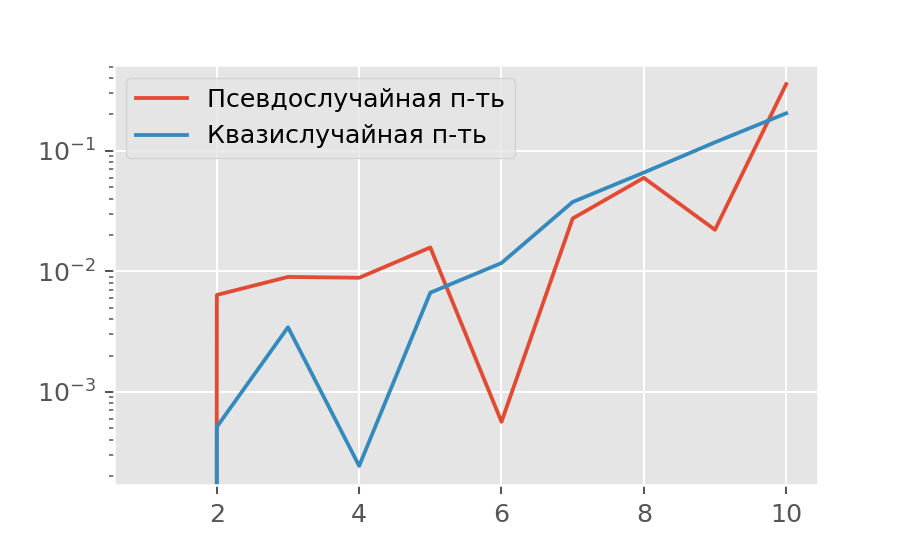

In [136]:
N = 10000

D = range(1, 11)
V_exact = np.asarray([getSphereVolumeExact(d) for d in D])

V_pseudo_random = np.asarray([getSphereVolumePseudorandom(N, d) for d in D])
eps_pseudo = np.abs((V_exact - V_pseudo_random)) / V_exact

V_quasi_random = np.asarray([getSphereVolumeQuasirandom(N, d) for d in D])
eps_quasi = np.abs((V_exact - V_quasi_random)) / V_exact

plt.figure(figsize=(5, 3))
plt.plot(D, eps_pseudo, label='Псевдослучайная п-ть')
plt.plot(D, eps_quasi, label='Квазислучайная п-ть')
plt.yscale("log")
plt.legend()
plt.show()

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

In [36]:
# Относительная точность для псевдослучайной последовательности "скачет", а для квазислучайной остаётся такой же.

## Задание 2

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [37]:
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    state = - 2 * np.random.randint(low=2, size=(N, N)) + 1
    
    return state

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [60]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает и возвращает изменение энергии ячейки (i,j) в случае ее переворота (не меняя состояния state)
    
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    
    ii = i + 1 if i < N - 1 else 0
    jj = j + 1 if j < N - 1 else 0
    
    dE = 2 * state[i, j] * (state[ii, j] + state[i, jj] + state[i - 1, j] + state[i, j - 1])

    return dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [61]:
def makeFlip(T, state):
    '''
    Функция N^2 раз переворачивает спин, и принимает решение оставить его перевернутым или нет, согласно правилам 4. и 5.
    
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    
    for k in range(N ** 2):
        i = np.random.randint(0, N, size=1)
        j = np.random.randint(0, N, size=1)
        dE = getDeltaE(i, j, state)
        if dE < 0:
            state[i, j] = - state[i, j]
        else:
            if np.random.rand() < np.exp(- dE / T):
                state[i, j] = - state[i, j]
                
    return state

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [62]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    
    N = state.shape[0]
    E = 0
    for i in range(N):
        for j in range(N):
            ii = i + 1 if i < N - 1 else 0
            jj = j + 1 if j < N - 1 else 0
        E += - state[i, j] * (state[ii, j] + state[i, jj] + state[i - 1, j] + state[i, j - 1])
            
    return E / 2

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [63]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    M = np.sum(state)
    
    return M

В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [127]:
N       = 10         # размер решетки NxN
Nt      = 80      # количество точек температуры
eqSteps = 150        # количество раз выполнения makeFlip для установления равновесия
steps   = 30      # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

<IPython.core.display.Javascript object>


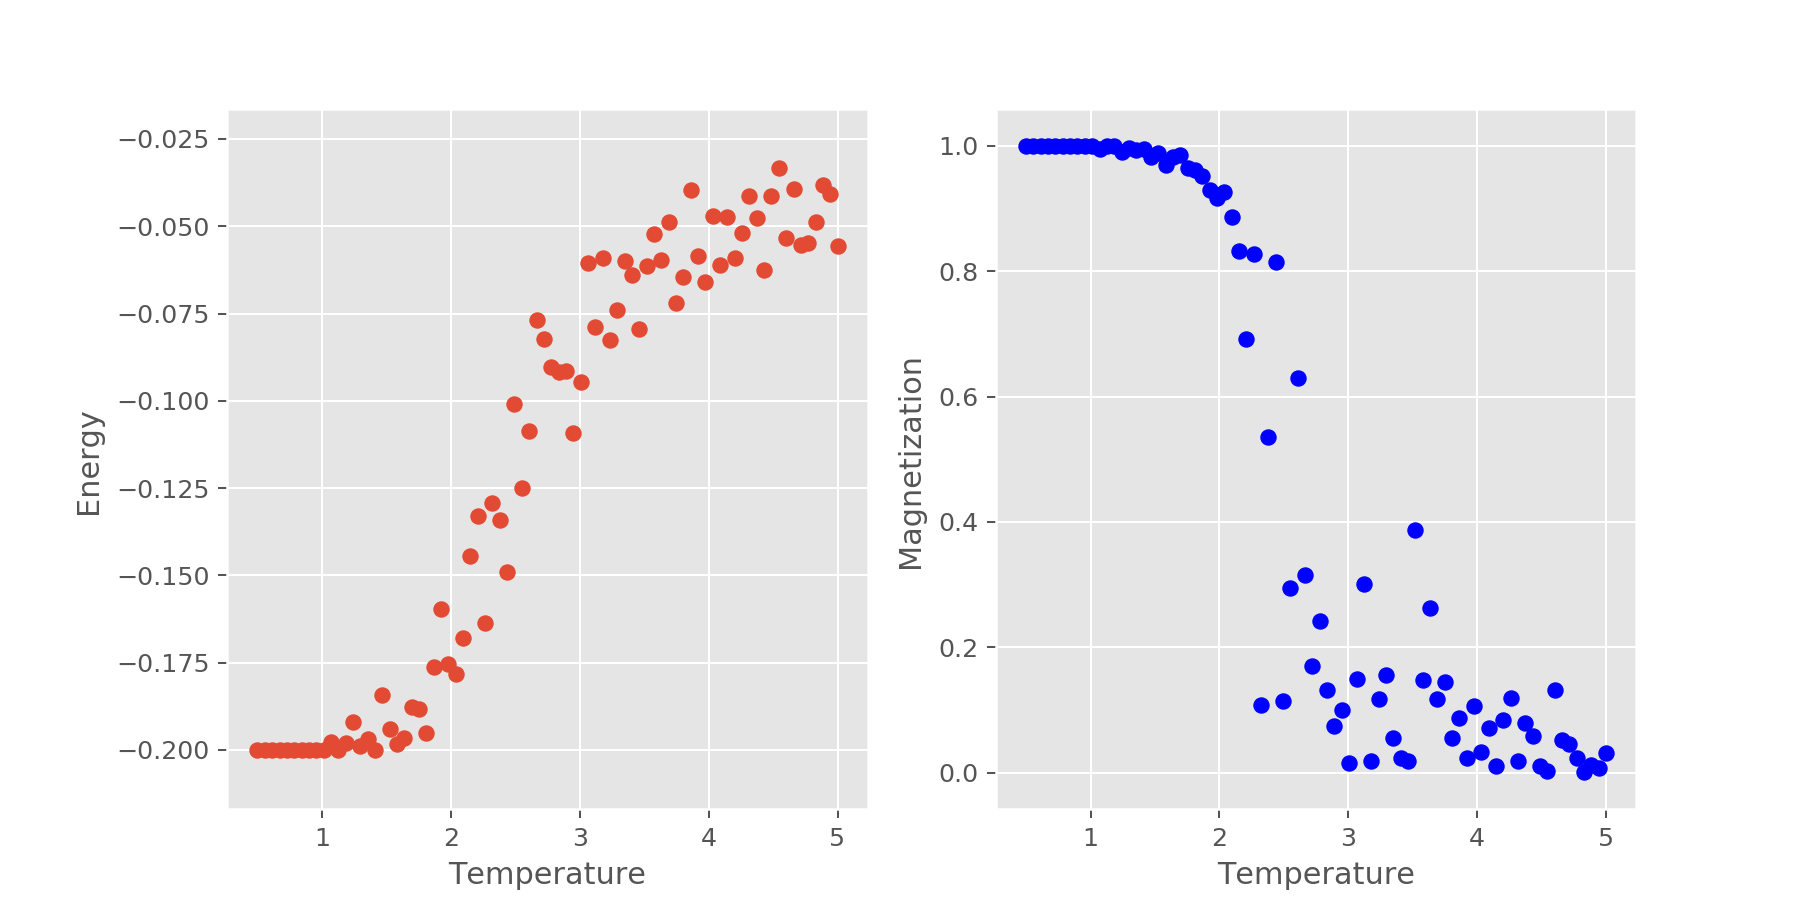

In [128]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1, 2, figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

In [18]:
# С увеличением температуры намагниченность уменьшается, а энергия увеличивается. Вроде бы, всё логично...

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

In [118]:
N = 64
state = getInitialState(N)

<IPython.core.display.Javascript object>


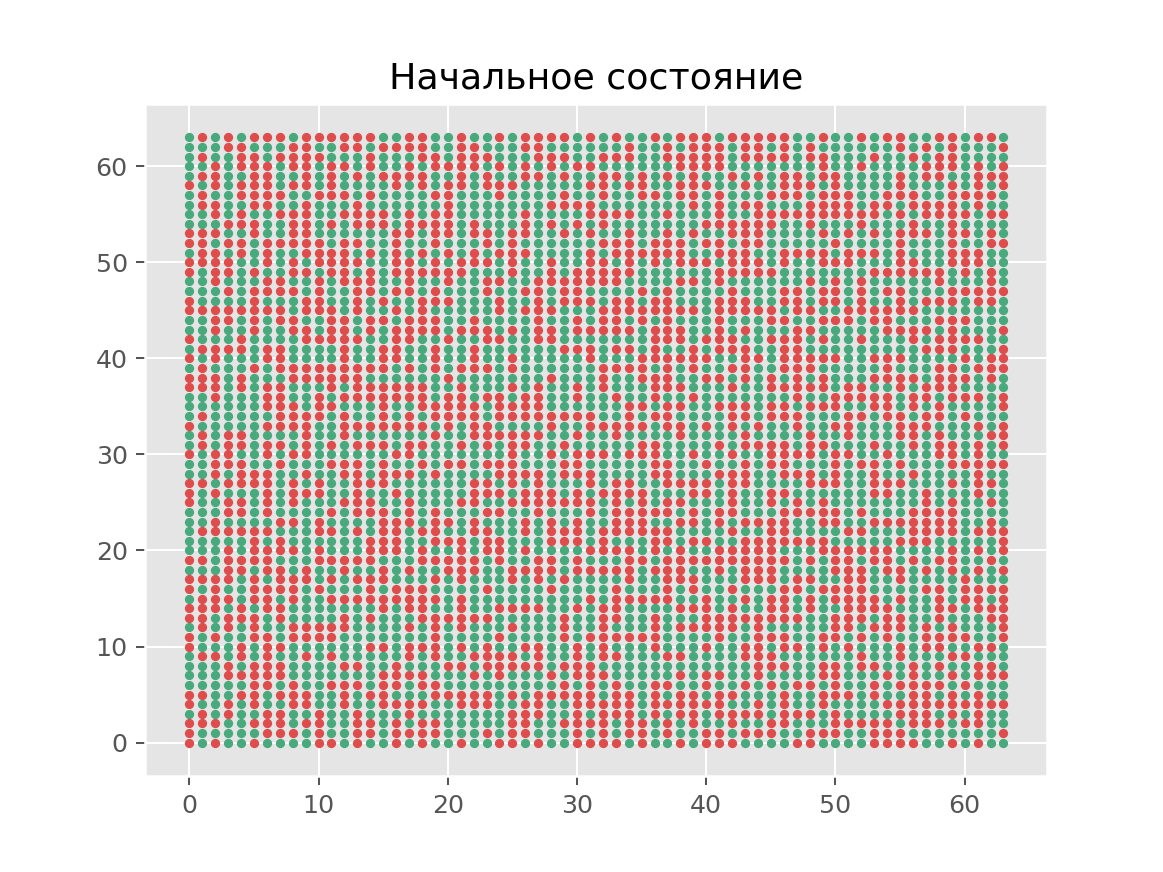

<IPython.core.display.Javascript object>


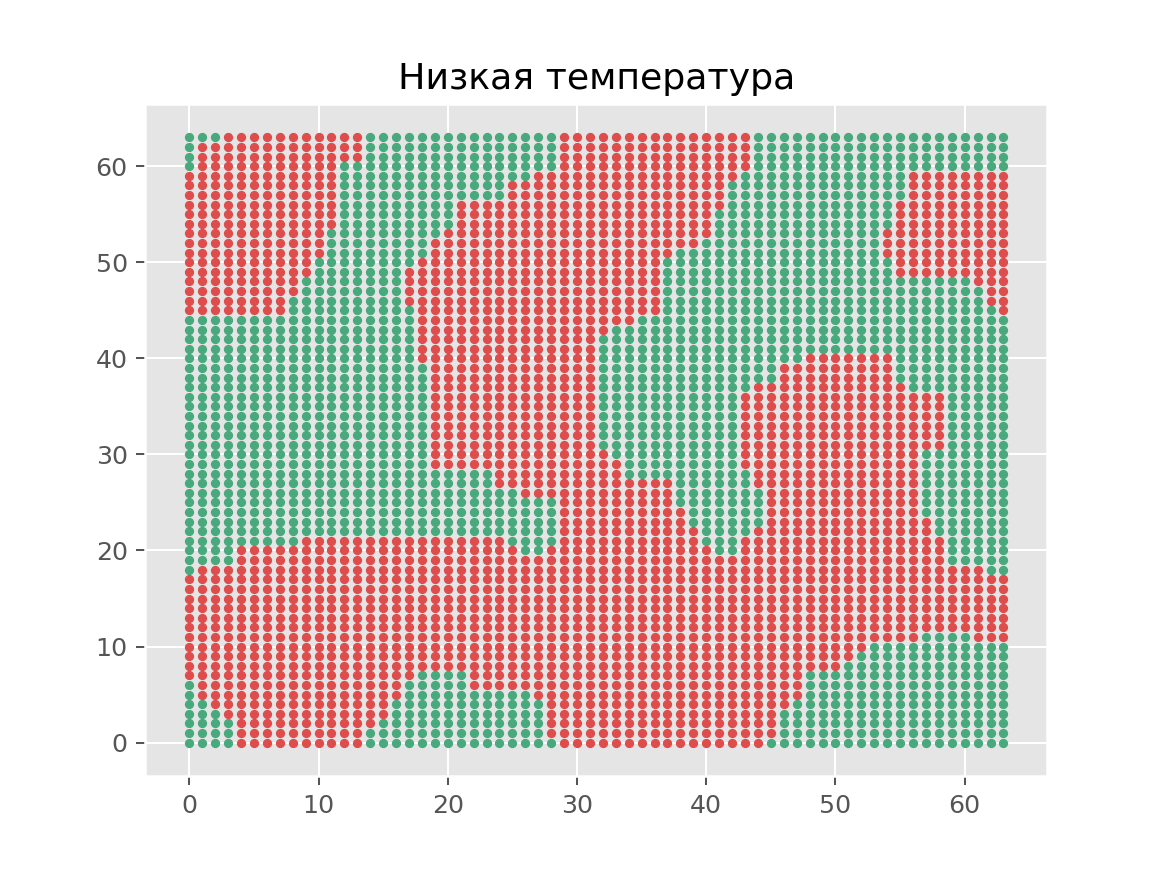

<IPython.core.display.Javascript object>


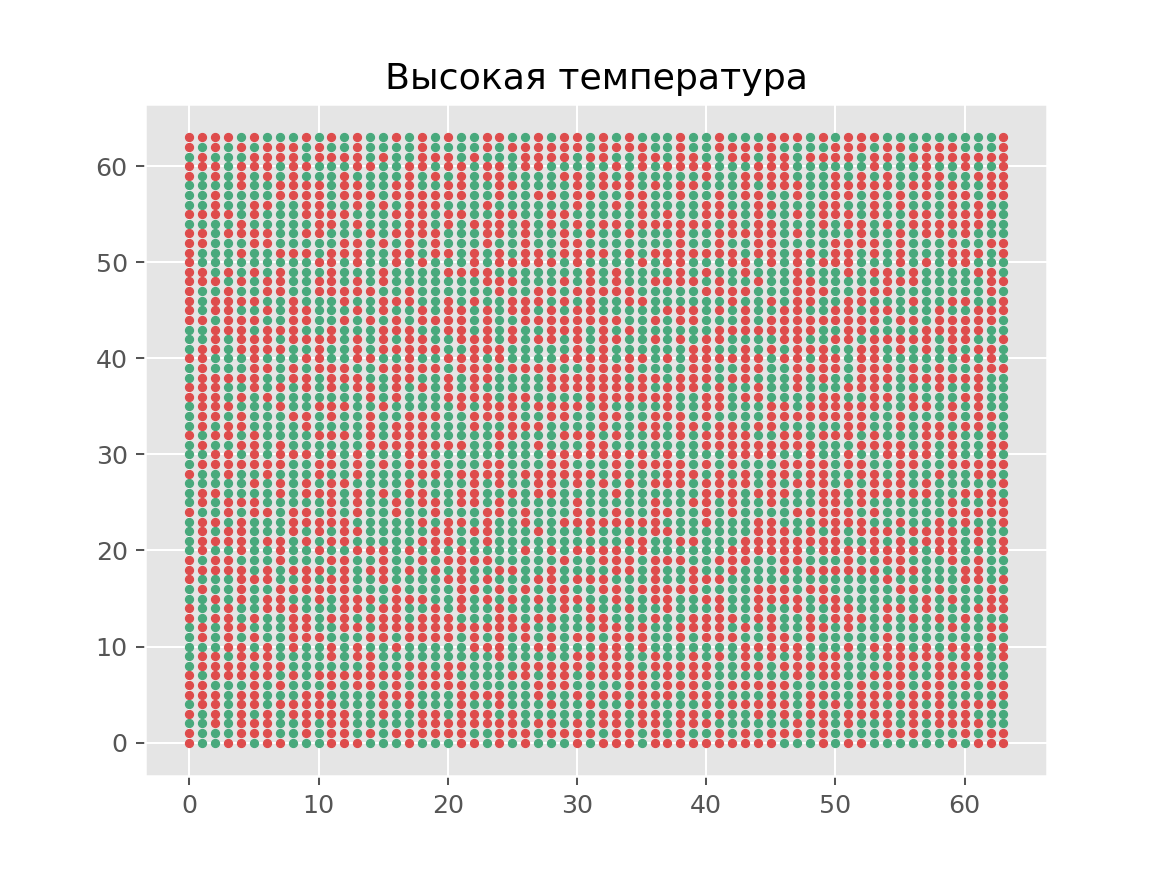

In [121]:
spin_up = np.nonzero(state + 1)
spin_down = np.nonzero(state - 1)

_, ax = plt.subplots()

ax.scatter(spin_up[1], spin_up[0], c='#48A97C', s=10)
ax.scatter(spin_down[1], spin_down[0], c='#DE4C4C', s=10)
ax.set_title('Начальное состояние')

plt.show()


for k in range(50):
    makeFlip(0.5, state)
    
spin_up = np.nonzero(state + 1)
spin_down = np.nonzero(state - 1)

_, ax = plt.subplots()

ax.scatter(spin_up[1], spin_up[0], c='#48A97C', s=10)
ax.scatter(spin_down[1], spin_down[0], c='#DE4C4C', s=10)
ax.set_title('Низкая температура')

plt.show()


for k in range(50):
    makeFlip(150, state)

spin_up = np.nonzero(state + 1)
spin_down = np.nonzero(state - 1)

_, ax = plt.subplots()

ax.scatter(spin_up[1], spin_up[0], c='#48A97C', s=10)
ax.scatter(spin_down[1], spin_down[0], c='#DE4C4C', s=10)
ax.set_title('Высокая температура')

plt.show()

In [130]:
# Для низких температур чётко видно образование областей, где спины смотрят в одном направлении.